In [2]:
from sklearn.datasets import fetch_california_housing

In [7]:
data = fetch_california_housing()

In [13]:
print(data["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [17]:
X = data["data"]
y = data["target"]

In [18]:
X.shape,y.shape

((20640, 8), (20640,))

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42,
)

In [20]:
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [21]:
y_train.shape, y_test.shape

((16512,), (4128,))

DATA ANALYSIS

In [22]:
import pandas as pd

In [44]:
df = pd.DataFrame(X_train,y_train, columns=data["feature_names"])


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,16512.0,3.880754,1.904294,0.499900,2.566700,3.545800,4.773175,15.000100
HouseAge,16512.0,28.608285,12.602499,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,16512.0,5.435235,2.387375,0.888889,4.452055,5.235874,6.061037,141.909091
AveBedrms,16512.0,1.096685,0.433215,0.333333,1.006508,1.049286,1.100348,25.636364
Population,16512.0,1426.453004,1137.056380,3.000000,789.000000,1167.000000,1726.000000,35682.000000
AveOccup,16512.0,3.096961,11.578744,0.692308,2.428799,2.817240,3.280000,1243.333333
Latitude,16512.0,35.643149,2.136665,32.550000,33.930000,34.260000,37.720000,41.950000
Longitude,16512.0,-119.582290,2.005654,-124.350000,-121.810000,-118.510000,-118.010000,-114.310000


In [37]:
df[df["AveOccup"]>=500]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1.375,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98
0.675,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51
3.500,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70


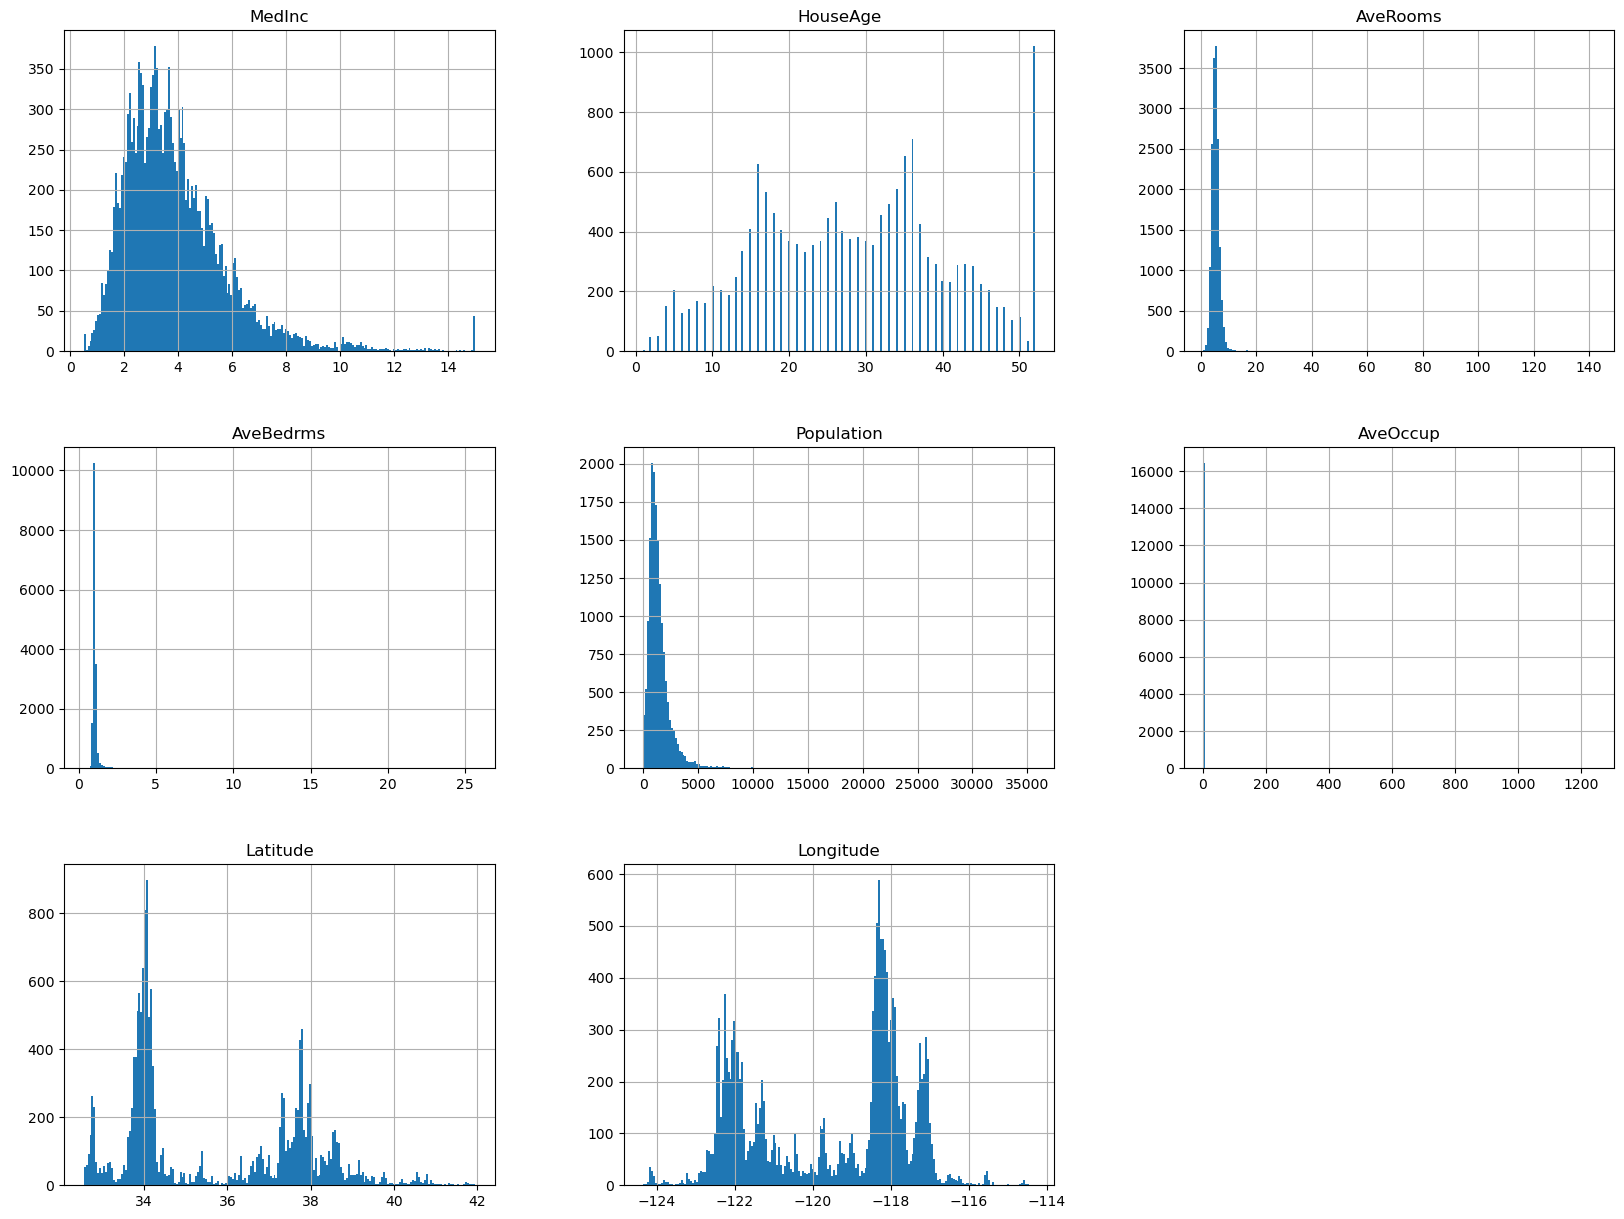

In [40]:
import matplotlib.pyplot as plt
df.hist(bins=200,figsize=(20,15))
plt.show()


In [42]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])